## Project: Visualizing the Orion Constellation

In this project you are Dr. Jillian Bellovary, a real-life astronomer for the Hayden Planetarium at the American Museum of Natural History. As an astronomer, part of your job is to study the stars. You've recently become interested in the constellation Orion, a collection of stars that appear in our night sky and form the shape of [Orion](https://en.wikipedia.org/wiki/Orion_(constellation)), a warrior God from ancient Greek mythology. 

As a researcher on the Hayden Planetarium team, you are in charge of visualizing the Orion constellation in 3D using the Matplotlib function `.scatter()`. To learn more about the `.scatter()` you can see the Matplotlib documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). 

You will create a rotate-able visualization of the position of the Orion's stars and get a better sense of their actual positions. To achieve this, you will be mapping real data from outer space that maps the position of the stars in the sky

The goal of the project is to understand spatial perspective. Once you visualize Orion in both 2D and 3D, you will be able to see the difference in the constellation shape humans see from earth versus the actual position of the stars that make up this constellation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Orion_constellation_with_star_labels.jpg" alt="Orion" style="width: 400px;"/>



## 1. Set-Up
The following set-up is new and specific to the project. It is very similar to the way you have imported Matplotlib in previous lessons.

+ Add `%matplotlib notebook` in the cell below. This is a new statement that you may not have seen before. It will allow you to be able to rotate your visualization in this jupyter notebook.

+ We will be using a subset of Matplotlib: `matplotlib.pyplot`. Import the subset as you have been importing it in previous lessons: `from matplotlib import pyplot as plt`


+ In order to see our 3D visualization, we also need to add this new line after we import Matplotlib:
`from mpl_toolkits.mplot3d import Axes3D`


In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Since I am revisiting the project anyway, I might as well learn how to use plot.ly. I import plot.ly here for offline
# use:
import plotly
import plotly.graph_objs as go

# Initiate Jupyter notebook integration for plot.ly:
plotly.offline.init_notebook_mode(connected=True)

## 2. Get familiar with real data

<font color = "red"> MAC note: I re-wrote this part to fix a glaring error in the explanation of declination and hour angle and to provide additional context for the x, y, and z coordinates used in this project. Some of the wording is mine; some of it is Codecademy's. My wording was no doubt influenced by the Wikipedia article linked to below. </font> <br>
Astronomers describe a star's position in the sky by using a pair of angles: declination and right ascension. Declination is similar to latitude, but it is projected on the celestial sphere. A declination of 0 degrees corresponds to the celestial equator; one of 90 degrees corresponds to the north celestial pole; and one of -90 degrees corresponds to the south celestial pole. Right ascension is similar to longitude, but it is projected on the celestial sphere and it is measured in hours, minutes, and seconds rather than in degrees. The quantity "hour angle" relates to right ascension, but it accounts for time of day at the observer's location. You can learn more about star position [here](https://en.wikipedia.org/wiki/Star_position).

The `x`, `y`, and `z` lists below are composed of the x, y, z coordinates for each star in the collection of stars that make up the Orion constellation as documented in a paper by Nottingham Trent Univesity on "The Orion constellation as an installation" found [here](https://arxiv.org/ftp/arxiv/papers/1110/1110.3469.pdf). x, y, and z are all measured in meters, and correspond to a particular model constructed by the paper's authors.

Spend some time looking at `x`, `y`, and `z`, does each fall within a range?

In [3]:
# Orion
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25,13.43]
z = [2.06, 0.84, 1.56, 2.07, 2.36, 1.72, 0.66, 1.25,1.38]

## 3. Create a 2D Visualization

Before we visualize the stars in 3D, let's get a sense of what they look like in 2D. 

Create a figure for the 2d plot and save it to a variable name `fig`. (hint: `plt.figure()`)

Add your subplot `.add_subplot()` as the single subplot, with `1,1,1`.(hint: `add_subplot(1,1,1)`)

Use the scatter [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize your `x` and `y` coordinates. (hint: `.scatter(x,y)`)

Render your visualization. (hint: `plt.show()`)

Does the 2D visualization look like the Orion constellation we see in the night sky? Do you recognize its shape in 2D? There is a curve to the sky, and this is a flat visualization, but we will visualize it in 3D in the next step to get a better sense of the actual star positions. 

<IPython.core.display.Javascript object>


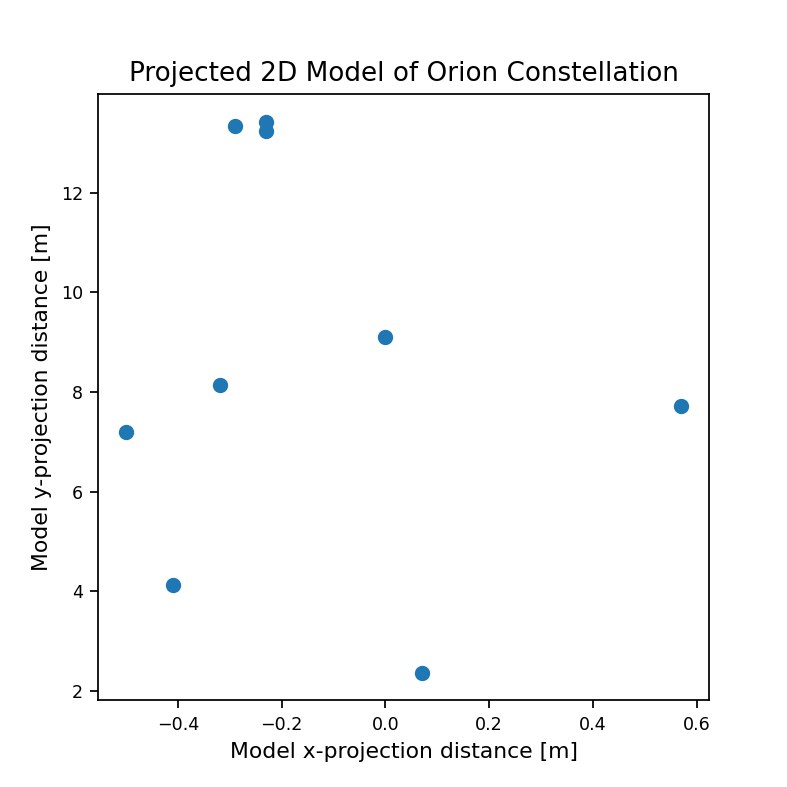

In [4]:
fig = plt.figure(figsize=(5,5))
fig.add_subplot(1,1,1)
plt.scatter(x,y)
plt.title("Projected 2D Model of Orion Constellation")
plt.xlabel("Model x-projection distance [m]")
plt.ylabel("Model y-projection distance [m]")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

In [5]:
# Let me redo the plot above with plot.ly:

plotly.offline.iplot({
    # make a scatter plot of the x and y data, using just markers (no lines), and customizing the marker size
    # and color:
    "data": [go.Scatter(x=x, y=y, mode='markers',\
                        marker={'size':6,'color':"mediumblue"})],
    # customize the plot layour:
    "layout": go.Layout(
                        # add a title which is centered on the plot:
                        title={'text':"Projected 2D Model of the Constellation Orion", 'x':0.5, 'y':0.9, \
                               'xanchor':'center','yanchor':'top'},\
                        # add an x-axis label:
                        xaxis_title="Model x-projection distance [m]",\
                        # add a y-axis label:
                        yaxis_title="Model y-projection distance [m]",\
                        # choose a template with a white background and gridlines:
                        template="presentation",
                        # set the font style, size, and color:
                        font={'family':"Times New Roman, monospace",'size':16,'color':"black"})
     })

## 4. Create a 3D Visualization

Create a figure for the 3D plot and save it to a variable name `fig_3d`. (hint: `plt.figure()`)


Since this will be a 3D projection, we want to make to tell Matplotlib this will be a 3D plot.  

To add a 3D projection, you must include a the projection argument. It would look like this:
```py
projection="3d"
```

Add your subplot with `.add_subplot()` as the single subplot `1,1,1` and specify your `projection` as `3d`:

`fig_3d.add_subplot(1,1,1,projection="3d")`)

Since this visualization will be in 3D, we will need our third dimension. In this case, our `z` coordinate. 

Create a new variable `constellation3d` and call the scatter [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) with your `x`, `y` and `z` coordinates. 

Include `z` just as you have been including the other two axes. (hint: `.scatter(x,y,z)`)

Render your visualization. (hint `plt.show()`.)


<IPython.core.display.Javascript object>


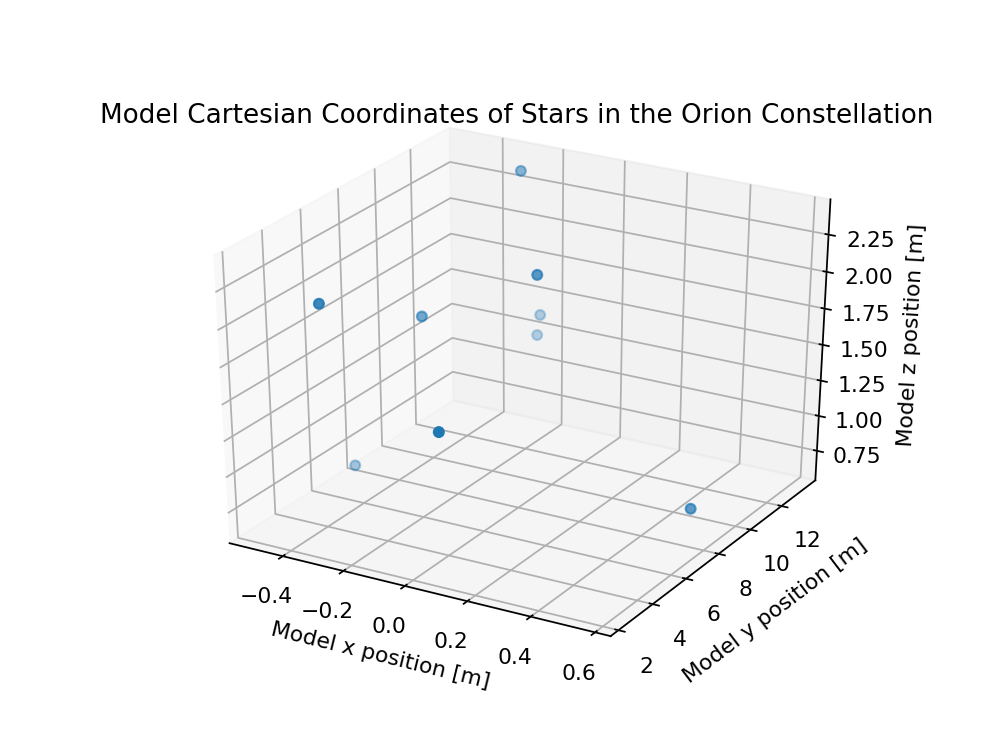

In [6]:
fig_3d = plt.figure()
ax = fig_3d.add_subplot(1,1,1,projection="3d")
ax.scatter(x,y,z)
ax.set_title("Model Cartesian Coordinates of Stars in the Orion Constellation")
ax.set_xlabel("Model x position [m]")
ax.set_ylabel("Model y position [m]")
ax.set_zlabel("Model z position [m]")
fig_3d.show()

In [7]:
# let me redo the above plot with plot.ly:
plotly.offline.iplot({
    # make a 3D scatter plot of the x, y, and z data, using just markers (no lines), and customizing the marker size
    # and color:
    "data": [go.Scatter3d(x=x, y=y, z=z, mode='markers',\
                          marker={'size':4,'color':"mediumblue"})],
    
    "layout": go.Layout(
                        # add a title which is centered on the plot:
                        title={'text':"Model Cartesian Coordinates of Stars in the Orion Constellation", \
                               'x':0.5, 'y':0.9, 'xanchor':'center','yanchor':'top'},\
                        # add axis labels:
                        scene = dict(xaxis_title="Model x position [m]",\
                                     yaxis_title="Model y position [m]",\
                                     zaxis_title="Model z position [m]"),\
                        # set a nice plot width and plot margins:
                        width=700,margin=dict(r=20, b=10, l=10, t=10),
                        # choose a template with a white background and gridlines:
                        template="presentation",
                        # set the font style, size, and color:
                        font={'family':"Times New Roman, monospace",'size':12,'color':"black"})
     })

## 5. Rotate and explore

Use your mouse to click and drag the 3D visualization in the previous step. This will rotate the scatter plot. As you rotate, can you see Orion from different angles? 

Note: The on and off button that appears above the 3D scatter plot allows you to toggle rotation of your 3D visualization in your notebook.

Take your time, rotate around! Remember, this will never look exactly like the Orion we see from Earth. The visualization does not curve as the night sky does.
There is beauty in the new understanding of Earthly perspective! We see the shape of the warrior Orion because of Earth's location in the universe and the location of the stars in that constellation.

Feel free to map more stars by looking up other celestial x, y, z coordinates [here](http://www.stellar-database.com/).
